In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [69]:
data = pd.read_csv('marketing_campaign.csv')
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,5524.0,1957.0,Graduation,Single,58138.0,NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,NaN,1954.0,NaN,Single,46344.0,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,4141.0,1965.0,Graduation,NaN,71613.0,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,6182.0,1984.0,Graduation,NaN,26646.0,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,5324.0,NaN,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0


In [70]:
data.drop('ID',axis=1,inplace=True)

In [71]:
#target column - Response

In [72]:
def viz(data,columns,numerical):
    plt.figure(figsize=(14,4))
    for i in range(len(columns)):
        plt.subplot(1,len(columns),i+1)
        if numerical:
            plt.hist(data[columns[i]],bins=15)
        else:
            counts = data.groupby(columns[i]).size()
            plt.bar(counts.index.astype(str),counts)

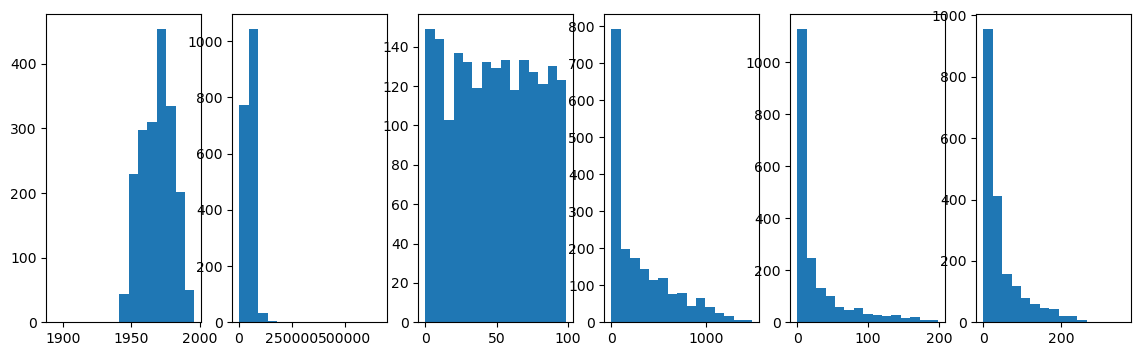

In [73]:
viz(data,['Year_Birth','Income','Recency','MntWines','MntFruits','MntGoldProds'],True)

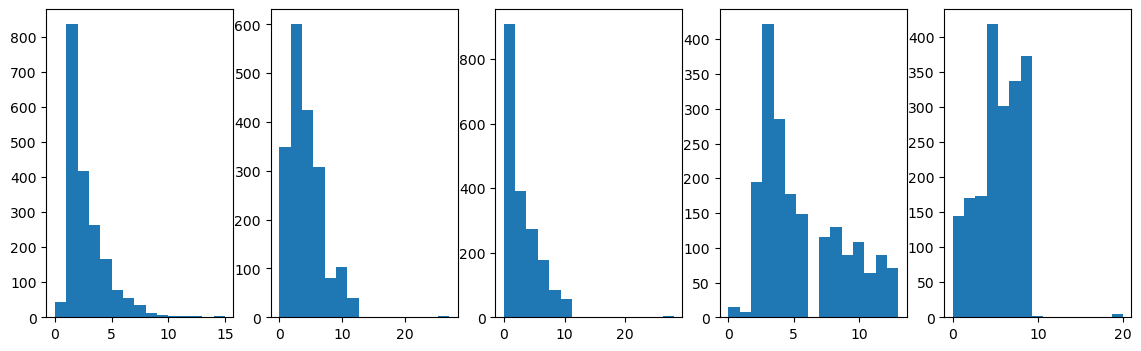

In [74]:
viz(data,['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'],True)

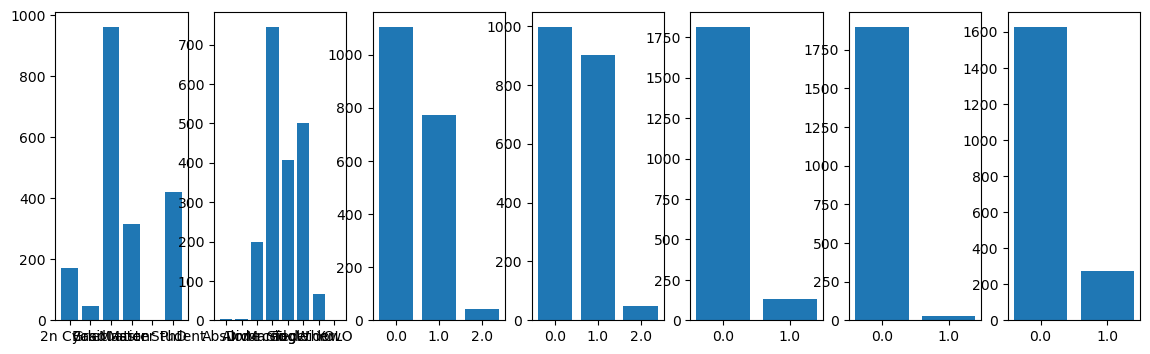

In [75]:
viz(data,['Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','Response'],False)

In [76]:
#nitu edna od numerickite promenlivi nema normalna raspredelba

In [77]:
data.isnull().sum()

Year_Birth             315
Education              319
Marital_Status         316
Income                 385
Kidhome                319
Teenhome               290
Dt_Customer            311
Recency                310
MntWines               333
MntFruits              310
MntGoldProds           319
NumDealsPurchases      304
NumWebPurchases        333
NumCatalogPurchases    340
NumStorePurchases      325
NumWebVisitsMonth      313
AcceptedCmp1           296
AcceptedCmp2           318
Response               340
dtype: int64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1925 non-null   float64
 1   Education            1921 non-null   object 
 2   Marital_Status       1924 non-null   object 
 3   Income               1855 non-null   float64
 4   Kidhome              1921 non-null   float64
 5   Teenhome             1950 non-null   float64
 6   Dt_Customer          1929 non-null   object 
 7   Recency              1930 non-null   float64
 8   MntWines             1907 non-null   float64
 9   MntFruits            1930 non-null   float64
 10  MntGoldProds         1921 non-null   float64
 11  NumDealsPurchases    1936 non-null   float64
 12  NumWebPurchases      1907 non-null   float64
 13  NumCatalogPurchases  1900 non-null   float64
 14  NumStorePurchases    1915 non-null   float64
 15  NumWebVisitsMonth    1927 non-null   f

In [79]:
data['Marital_Status'].unique()

array(['Single', nan, 'Married', 'Together', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [80]:
data['Education'].unique()

array(['Graduation', nan, 'PhD', 'Master', 'Basic', '2n Cycle',
       'Master Student'], dtype=object)

In [81]:
def label_data(data,columns):
    data_copy = data.copy()
    le = LabelEncoder()
    for column in columns:
        no_nans = data_copy[column].dropna()
        le.fit(no_nans)
        data_copy[column] = data_copy[column].apply(lambda x : le.transform([x])[0] if pd.notna(x) else x)
    return data_copy

In [82]:
data = label_data(data,['Marital_Status'])

In [83]:
#biten e redosledot kaj obrazovanieto zatoa custom encoding
def custom_encode(x):
    if type(x) == float:
        return x
    if 'Basic' in x:
        return -1
    if '2n Cycle' in x:
        return 0
    if 'Master Student' in x:
        return 1
    if 'Master' in x:
        return 2
    if 'Graduation' in x:
        return 3
    if 'PhD' in x:
        return 4

In [84]:
data['Education'] = data['Education'].apply(custom_encode)
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,1957.0,3.0,4.0,58138.0,NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,1954.0,NaN,4.0,46344.0,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,1965.0,3.0,NaN,71613.0,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,1984.0,3.0,NaN,26646.0,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,NaN,4.0,3.0,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0


In [85]:
data.drop('Dt_Customer',axis=1,inplace=True)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1925 non-null   float64
 1   Education            1921 non-null   float64
 2   Marital_Status       1924 non-null   float64
 3   Income               1855 non-null   float64
 4   Kidhome              1921 non-null   float64
 5   Teenhome             1950 non-null   float64
 6   Recency              1930 non-null   float64
 7   MntWines             1907 non-null   float64
 8   MntFruits            1930 non-null   float64
 9   MntGoldProds         1921 non-null   float64
 10  NumDealsPurchases    1936 non-null   float64
 11  NumWebPurchases      1907 non-null   float64
 12  NumCatalogPurchases  1900 non-null   float64
 13  NumStorePurchases    1915 non-null   float64
 14  NumWebVisitsMonth    1927 non-null   float64
 15  AcceptedCmp1         1944 non-null   f

In [87]:
#pravime heatmap da vidime koi promenlivi se vo visoka korelacija pomegju sebe za spravuvanje so missing values

<Axes: >

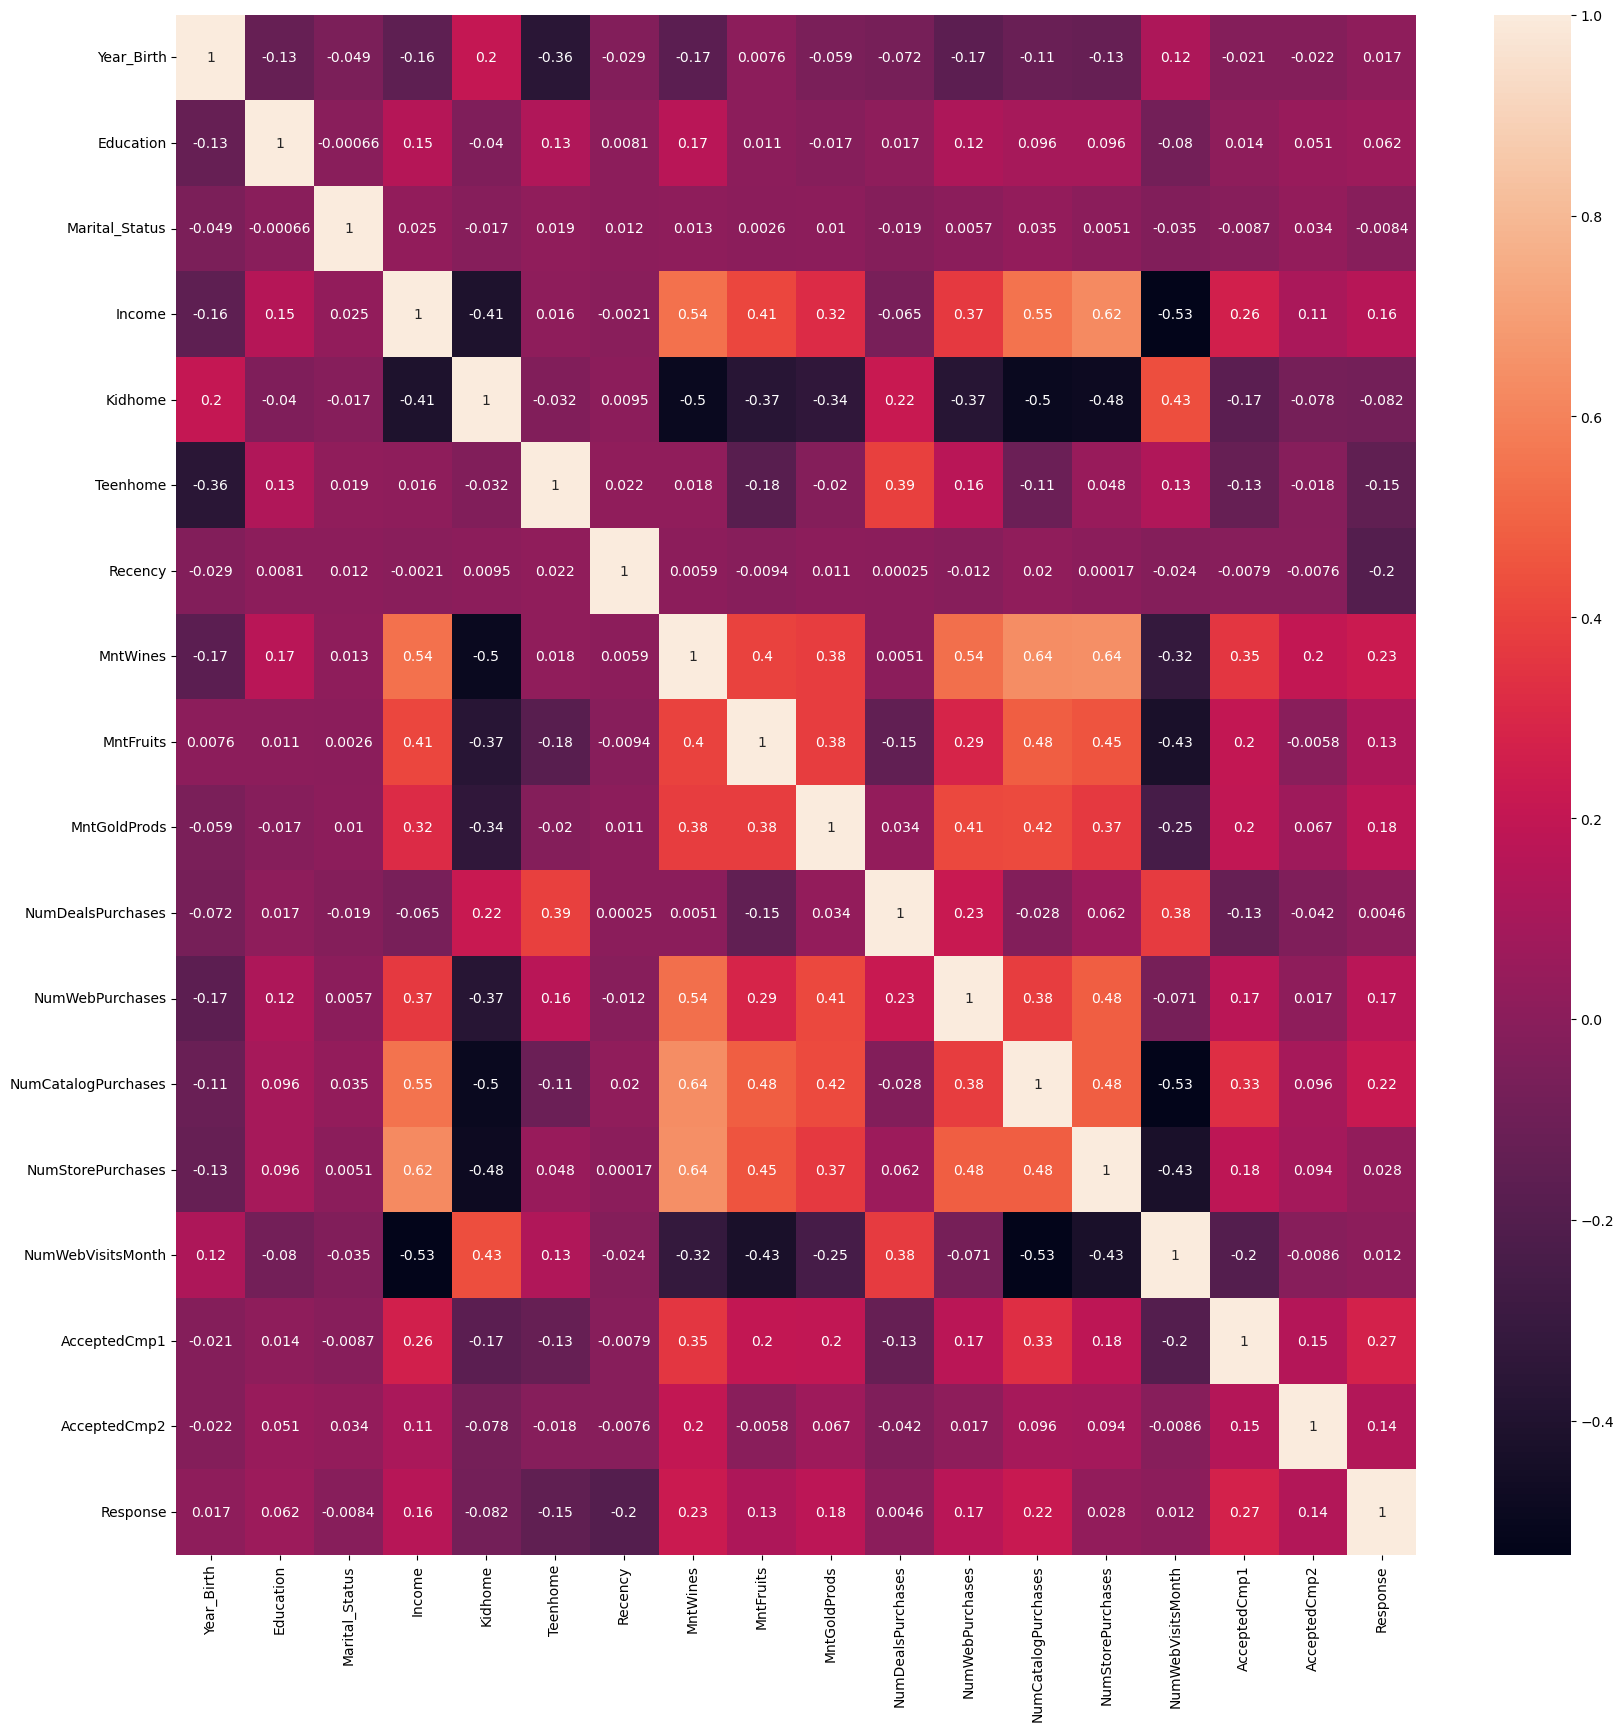

In [88]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [89]:
#NumStorePurchases so Income , NumCatalogPurchases so MntWines vo KNN , tie se vo visoka korelacija
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['NumStorePurchases', 'Income']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
data[['NumStorePurchases', 'Income']] = imputed_data

In [90]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['MntWines', 'NumCatalogPurchases']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
data[['MntWines', 'NumCatalogPurchases']] = imputed_data

In [91]:
data.isnull().sum()

Year_Birth             315
Education              319
Marital_Status         316
Income                   0
Kidhome                319
Teenhome               290
Recency                310
MntWines                 0
MntFruits              310
MntGoldProds           319
NumDealsPurchases      304
NumWebPurchases        333
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth      313
AcceptedCmp1           296
AcceptedCmp2           318
Response               340
dtype: int64

In [92]:
#data.ShoppingMall = data.ShoppingMall.fillna(data.ShoppingMall.median())
def impute_median(data,columns):
    data_copy = data.copy()
    for column in columns:
        data_copy[column] = data_copy[column].fillna(data[column].median())
    return data_copy

In [93]:
data = impute_median(data,['Year_Birth','MntFruits','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth','Recency'])

In [94]:
data.isnull().sum()

Year_Birth               0
Education              319
Marital_Status         316
Income                   0
Kidhome                319
Teenhome               290
Recency                  0
MntWines                 0
MntFruits                0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp1           296
AcceptedCmp2           318
Response               340
dtype: int64

In [95]:
#target promenlivata ima missing values, kaj nejze najdobro smetam e da se primeni brisenje po redici
data = data.dropna(subset=['Response'], axis=0)

In [96]:
data.isnull().sum()

Year_Birth               0
Education              273
Marital_Status         261
Income                   0
Kidhome                274
Teenhome               249
Recency                  0
MntWines                 0
MntFruits                0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp1           257
AcceptedCmp2           266
Response                 0
dtype: int64

In [128]:
#kaj ostanatite koi se kategoriski promenlivi za spravuvanje so missing values ke iskoristam imputacija so most frequent imputer/moda

In [130]:
imputer = SimpleImputer(strategy='most_frequent')
data[['Education']] = imputer.fit_transform(data[['Education']])

In [142]:
data[['Marital_Status']] = imputer.fit_transform(data[['Marital_Status']])
data[['Kidhome']] = imputer.fit_transform(data[['Kidhome']])
data[['Teenhome']] = imputer.fit_transform(data[['Teenhome']])
data[['AcceptedCmp2']] = imputer.fit_transform(data[['AcceptedCmp2']])

In [144]:
data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Tennhome               0
dtype: int64

In [146]:
#podelba na datasetot vo ratio 80:20 

In [148]:
from sklearn.model_selection import train_test_split
data_new = data.drop('Response',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(data_new,data['Response'],test_size=0.2)

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [158]:
y_pred = model.predict(X_test)

In [160]:
from sklearn.metrics import f1_score,classification_report,accuracy_score

f1_score(Y_test,y_pred,average='micro')

0.8447368421052631

In [162]:
#iskoristiv model na logisticka regresija, zatoa sto spored mene najdobro e da se iskoristi ovoj model dokolku promenlivata
# sto ja predviduavame e binarna (kako vo ovoj slucaj)

In [164]:
#modelot na logisticka regresija e statisticki model koj se koristi za problemi na klasifikacija (binarna najcesto)
#koristi logisticka funkcija koja linearnata kombinacija na nezavisni promenlivi ja pretvora vo vrednost vo opseg od 0 do 1.
#Dokolku rezultatot koj se dobiva e pomal od 0.5 togas target promenlivata ke se klasificira deka pripagja na klasa 0, vo sprotivno na klasa 1
#Sepak ovoj model ima nedostatok a toa e sto e cuvstvitelen na outliers.